In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob
import os
from imutils import paths
import random
import shutil

from sklearn.metrics import classification_report

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,AveragePooling2D,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [ ]:
# Dataset
# !git clone https://github.com/jriede/ml-data.git

In [10]:
pwd

'F:\\Data Set\\Transfer learning\\Resnet 50'

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'camouflage-clothing',
 'Data',
 'fine-tune-resnet',
 'Resnet 50.ipynb']

In [30]:
classes=(glob('F:\Data Set\Transfer learning\Resnet 50\Data\*'))
classes

['F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\normal']

In [52]:
train_path='F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage'
test_path='F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\normal'

In [101]:
# [x for x in glob(os.path.join('F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage','*.jpg'))]
imagePaths=list(paths.list_images('F:\\Data Set\\Transfer learning\\Resnet 50\\Data'))
random.seed(42)
random.shuffle(imagePaths)
imagePaths

['F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage\\00000031.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage\\00003716.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage\\00001374.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage\\00003029.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage\\00000421.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\normal\\normal\\00000160.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\normal\\normal\\00001119.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\normal\\normal\\00002391.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\normal\\normal\\00000202.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\normal\\normal\\00000230.jpg',
 'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage\\00002894.jpg',
 'F:\\Data Set\\Transfer learning\\Resn

In [102]:
i=int(len(imagePaths) *0.75)
i

4119

In [103]:
trainPaths = imagePaths[:i]
testPaths = imagePaths[i:]

In [104]:
i = int(len(trainPaths) * 0.1)
valPaths = trainPaths[:i]
trainPaths = trainPaths[i:]

In [155]:
basepath='F:\\Data Set\\Transfer learning\\Resnet 50\\Data'
trainfolder=os.path.join(basepath, "train")
testfolder=os.path.join(basepath, "test")
valfolder=os.path.join(basepath, "val")
print(trainfolder)

F:\Data Set\Transfer learning\Resnet 50\Data\train


* Practice -- Start

In [125]:
imagePaths[0]

'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\camouflage\\00000031.jpg'

In [134]:
# imagePaths[0].split('\\')
imagePaths[0].split(os.path.sep)

['F:',
 'Data Set',
 'Transfer learning',
 'Resnet 50',
 'Data',
 'camouflage',
 'camouflage',
 '00000031.jpg']

In [135]:
filename=imagePaths[0].split(os.path.sep)[-1]
label=imagePaths[0].split(os.path.sep)[-2]

In [136]:
filename,label

('00000031.jpg', 'camouflage')

In [139]:
label_path=os.path.join(basepath,label)
label_path

'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage'

In [142]:
p=os.path.sep.join([label_path, filename])
p

'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\00000031.jpg'

In [146]:
shutil.copy2(imagePaths[0], p)

'F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\camouflage\\00000031.jpg'

* Practice -- End

In [148]:
datasets = [
	("training", trainPaths, trainfolder),
	("validation", valPaths, valfolder),
	("testing", testPaths, testfolder)
]

# loop over the datasets
for (dType, imagePaths, baseOutput) in datasets:
    # show which data split we are creating
    print("[INFO] building '{}' split".format(dType))

    # if the output base output directory does not exist, create it
    if not os.path.exists(baseOutput):
        print("[INFO] 'creating {}' directory".format(baseOutput))
        os.makedirs(baseOutput)

    # loop over the input image paths
    for inputPath in imagePaths:
        # extract the filename of the input image along with its
        # corresponding class label
        filename = inputPath.split(os.path.sep)[-1]
        label = inputPath.split(os.path.sep)[-2]

        # build the path to the label directory
        labelPath = os.path.sep.join([baseOutput, label])

        # if the label output directory does not exist, create it
        if not os.path.exists(labelPath):
            print("[INFO] 'creating {}' directory".format(labelPath))
            os.makedirs(labelPath)

        # construct the path to the destination image and then copy
        # the image itself
        p = os.path.sep.join([labelPath, filename])
        shutil.copy2(inputPath, p)

[INFO] building 'training' split
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\train' directory
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\train\camouflage' directory
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\train\normal' directory
[INFO] building 'validation' split
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\val' directory
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\val\camouflage' directory
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\val\normal' directory
[INFO] building 'testing' split
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\test' directory
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\test\camouflage' directory
[INFO] 'creating F:\Data Set\Transfer learning\Resnet 50\Data\test\normal' directory


## Modeling

In [149]:
pwd

'F:\\Data Set\\Transfer learning\\Resnet 50'

In [348]:
folders=glob('Data\\train\*')
folders

['Data\\train\\camouflage', 'Data\\train\\normal']

Wall time: 53.7 ms


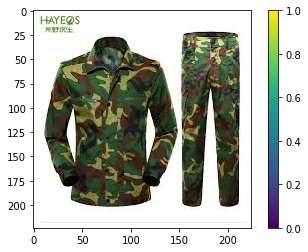

In [205]:
%%time
path='F:\\Data Set\\Transfer learning\\Resnet 50\\Data\\train\\camouflage\\00000005.jpg'
img=image.load_img(path, target_size=(224,224,3))
img=image.img_to_array(img)
img=img/255.0
plt.imshow(img)
plt.colorbar()

In [349]:
train_aug = ImageDataGenerator(
	rotation_range=25,
	zoom_range=0.1,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.2,
	horizontal_flip=True,
	fill_mode="nearest")
val_aug = ImageDataGenerator(rescale = 1./255)


In [350]:
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
train_datagen.mean = mean
val_datagen.mean = mean

* Tip- image data generator expects folder in path we give 
* In this case trainfolder

In [351]:

training_set = train_aug.flow_from_directory(trainfolder,
                                                 target_size = (224, 224),
                                                 batch_size =32 ,
                                                 shuffle=False,
                                                 color_mode="rgb",
                                                 class_mode = 'categorical')

val_set = val_aug.flow_from_directory(valfolder,
                                                 target_size = (224, 224),
                                                 batch_size =32 ,
                                                 shuffle=False,
                                                 color_mode="rgb",
                                                 class_mode = 'categorical')

test_set = val_aug.flow_from_directory(testfolder,
                                                 target_size = (224, 224),
                                                 batch_size =32 ,
                                                 shuffle=False,
                                                 color_mode="rgb",
                                                 class_mode = 'categorical')

Found 3708 images belonging to 2 classes.
Found 411 images belonging to 2 classes.
Found 1374 images belonging to 2 classes.


In [352]:
CLASSES = ["camouflage_clothes", "normal_clothes"]

In [353]:
# Model
r50=ResNet50(input_shape=(224,224,3),weights='imagenet',include_top=False)

C:\Users\rasoo\Anaconda3\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [354]:
for layer in r50.layers:
    layer.trainable = False

In [355]:
r50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [356]:
x=AveragePooling2D(pool_size=(7,7))(r50.output)
x=Flatten()(x)
x=Dense(256,activation='relu')(x)
x=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=(r50.input),outputs=x)

### Call Backs

- https://keras.io/callbacks/#modelcheckpoint

In [357]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

weight_path="{}_weights.best.hdf5".format('model')    #### Where u want give path

checkpoint = ModelCheckpoint(filepath=weight_path, 
                             mode='min',
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only = True,
                             verbose=1,)

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 3, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped


callbacks_list = [checkpoint, earlystop]

Here is the main part, we always want find best learning rate

above we choose adam with lr and decay

here other option we have
  1. ReduceLROnPlateau
  2. LearningRateScheduler --> input= epoch index and current Learning rate
                                      gives new Learning rate

In [347]:
# here we are not choosing because we gave Adam with lr and decay
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2, #-----factor=lr*factor
                              patience = 3, #----- wait for 3-epochs
                              verbose = 1, 
                              min_delta = 0.0001,
                             min_lr=0.001)# This minimum Learning rate we want

### Optimizer

In [358]:
# https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/
from tensorflow.keras.optimizers import Adam
epochs=3
lr=1e-4
opt=Adam(lr=lr,    decay=lr/epochs)

In [346]:
1e-4

0.0001

In [359]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [360]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [361]:
epochs=1
history=model.fit_generator(training_set,
                           epochs=epochs,
                           steps_per_epoch=len(training_set)/16,
                           validation_data=val_set,
                           validation_steps=len(val_set)/16,
                           callbacks=callbacks_list)

7/7 [===========================>..] - ETA: 5s - loss: 1.0476 - accuracy: 0.3273 
Epoch 00001: val_loss improved from inf to 0.17164, saving model to model_weights.best.hdf5
8/7 [=================================] - 195s 24s/step - loss: 1.0351 - accuracy: 0.3294 - val_loss: 0.1716 - val_accuracy: 1.0000


In [293]:
history.history

{'loss': [1.1279598977416754, 0.9424638673663139, 0.8506371853873134],
 'accuracy': [0.4609375, 0.44140625, 0.6640625],
 'val_loss': [0.9142814049353967, 0.7921008330125076, 0.47905749541062576],
 'val_accuracy': [0.0625, 0.96875, 1.0]}

In [ ]:
# test_set.filenames

In [324]:
test_set.class_indices.keys()

dict_keys(['camouflage', 'normal'])

In [310]:
It take 

scores = model.evaluate_generator(test_set,1) #1514 testing images
scores[-1]

1.0

In [313]:
test_set.reset()
predIdxs = model.predict_generator(test_set,steps=(len(test_set.filenames) //32) + 1)

In [ ]:
predIdxs

In [ ]:
predIdxs = np.argmax(predIdxs, axis=1)
#                         or
# here we can choose probability >0.5 or any thing else &  as Ypred
# ypred = predIdxs > 0.5

In [318]:
predIdxs

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [322]:
ypred=predIdxs.copy()
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [320]:
y_true=test_set.classes
y_true

array([0, 0, 0, ..., 1, 1, 1])

## Classification Report

In [327]:
#classification_report(y_true, y_pred,      target_names=['camouflage', 'normal']

print(classification_report(test_set.classes, predIdxs,target_names=test_set.class_indices.keys()))

              precision    recall  f1-score   support

  camouflage       0.59      1.00      0.74       812
      normal       0.00      0.00      0.00       562

    accuracy                           0.59      1374
   macro avg       0.30      0.50      0.37      1374
weighted avg       0.35      0.59      0.44      1374



## Confusion Matrix

In [328]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [332]:
cm=confusion_matrix(y_true,ypred)
cm

array([[810,   2],
       [562,   0]], dtype=int64)

In [330]:
810+0/(810+562+2+0)

0.5895196506550219

## Accuracy

In [338]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, ypred)

0.5895196506550219

## Graphical Confusion Matrix

(<Figure size 216x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b3427289c8>)

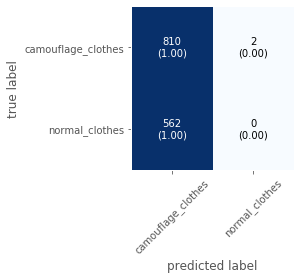

In [335]:
plot_confusion_matrix(cm,figsize=(3,3), class_names=CLASSES, show_normed=True)

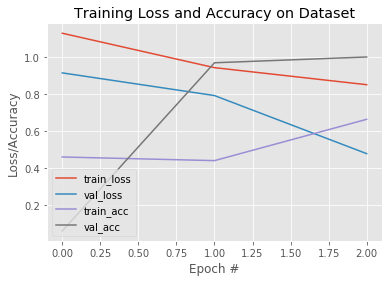

In [295]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")